In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Name,New Code,GCSE_Score,Density,Eng_HH,Lone_Parent,House_Price,Income,Qual_Level4,Out_Work_Fam,Absence,Crime,Bad_Health,Happiness,Green_Space,PTAL,Cars_HH,Deprivation
0,City of London,E09000001,354.500000,2312.500000,3862,153,765000.0,99390.0,68.4,9.500000,0.700000,680.720631,3.4,7.640332,18.629014,7.900000,0.385861,12.124906
1,Abbey,E05000026,317.657759,9884.615385,3397,648,173000.0,38870.0,34.5,22.077922,1.356022,142.212846,4.3,7.897959,21.908601,5.989365,0.547682,32.726127
2,Alibon,E05000027,307.445732,7464.285714,3656,832,215000.0,37290.0,16.7,24.714286,1.489166,75.689606,6.7,7.358842,20.621849,3.145890,0.815160,36.066225
3,Becontree,E05000028,295.451381,8923.076923,3826,880,210000.0,37860.0,20.6,22.023810,1.465376,79.325731,7.0,7.609123,1.885448,2.871767,0.870236,31.686544
4,Chadwell Heath,E05000029,293.437838,2970.588235,3685,776,240500.0,38860.0,19.5,24.333333,1.604042,72.407045,6.8,7.108108,55.974507,2.260909,0.918062,38.044504


In [4]:
# Set display options to disable scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Select numeric columns, excluding 'Name' and 'New Code'
numeric_columns = data.drop(columns=['Name', 'New Code'])

# Calculate descriptive statistics
descriptive_stats = numeric_columns.describe()

# Select only min, mean, std, and max
descriptive_stats = descriptive_stats.loc[['min', 'mean', 'std', 'max']]

# Round to four decimal places
descriptive_stats = descriptive_stats.round(4)

# Output the result
descriptive_stats.head()


,GCSE_Score,Density,Eng_HH,Lone_Parent,House_Price,Income,Qual_Level4,Out_Work_Fam,Absence,Crime,Bad_Health,Happiness,Green_Space,PTAL,Cars_HH,Deprivation
min,275.9500,177.5862,2073.0000,152.0000,173000.0000,32250.0000,12.5000,0.8108,0.0000,22.9129,1.8000,6.7803,0.0000,1.3247,0.2333,4.8771
mean,327.2666,8036.4951,4550.6736,661.5424,434450.7416,52515.2640,37.6578,15.6738,1.0720,82.3894,4.9218,7.6335,27.1553,3.7707,0.8426,24.9454
std,21.5595,4762.2243,959.8494,287.6127,268205.6336,16783.6050,12.8592,7.4884,0.3402,84.3186,1.2615,0.3181,17.6343,1.3995,0.3262,11.2092
max,396.2132,29375.0000,8285.0000,1674.0000,3500000.0000,176950.0000,68.7000,35.5224,2.2411,1440.1562,10.9000,8.5547,88.5304,7.9963,1.7051,54.7832


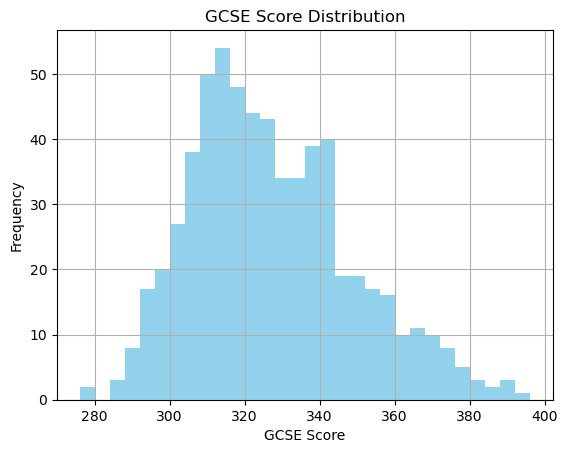

In [9]:
# Get the data from the 'GCSE_Score' column
GCSE_Score = data['GCSE_Score']

# Plot the histogram of GCSE_Score
plt.hist(GCSE_Score, bins=30, color='skyblue', alpha=0.9)
plt.title('GCSE Score Distribution')
plt.xlabel('GCSE Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
plt.savefig('1.jpg')

<Figure size 640x480 with 0 Axes>

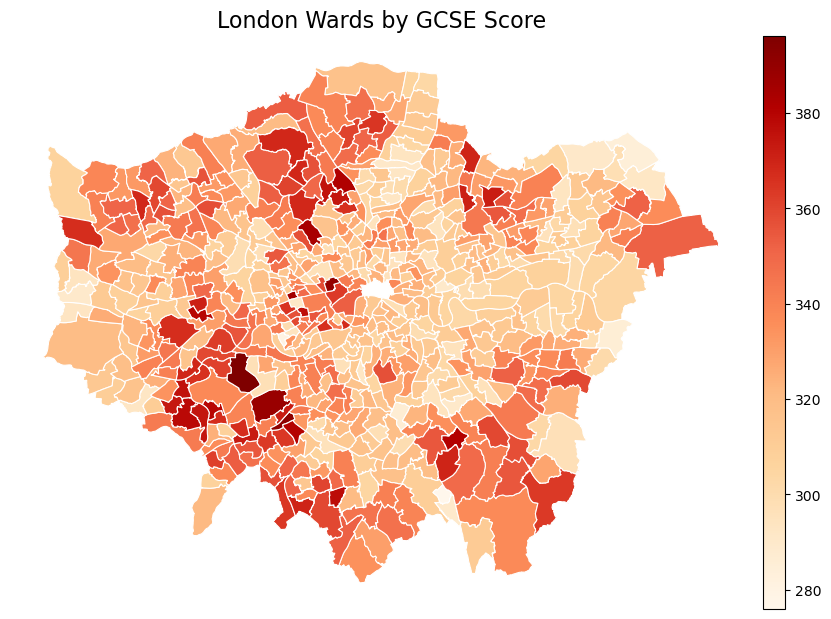

In [6]:
# Read the Shapefile
shapefile_path = 'ward/London_Ward.shp'
gdf = gpd.read_file(shapefile_path)

# Merge the data based on 'GSS_CODE' and 'New Code'
merged_gdf = gdf.merge(data, left_on='GSS_CODE', right_on='New Code')

# Plot the map, color-coded by 'GCSE_Score'
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the map with internal boundary color set to white
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # Adjust the color bar size

merged_gdf.plot(column='GCSE_Score', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='white', legend=True, cax=cax)

# Remove the axis
ax.axis('off')

# Set the title
ax.set_title('London Wards by GCSE Score', fontsize=16)

# Show the map
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

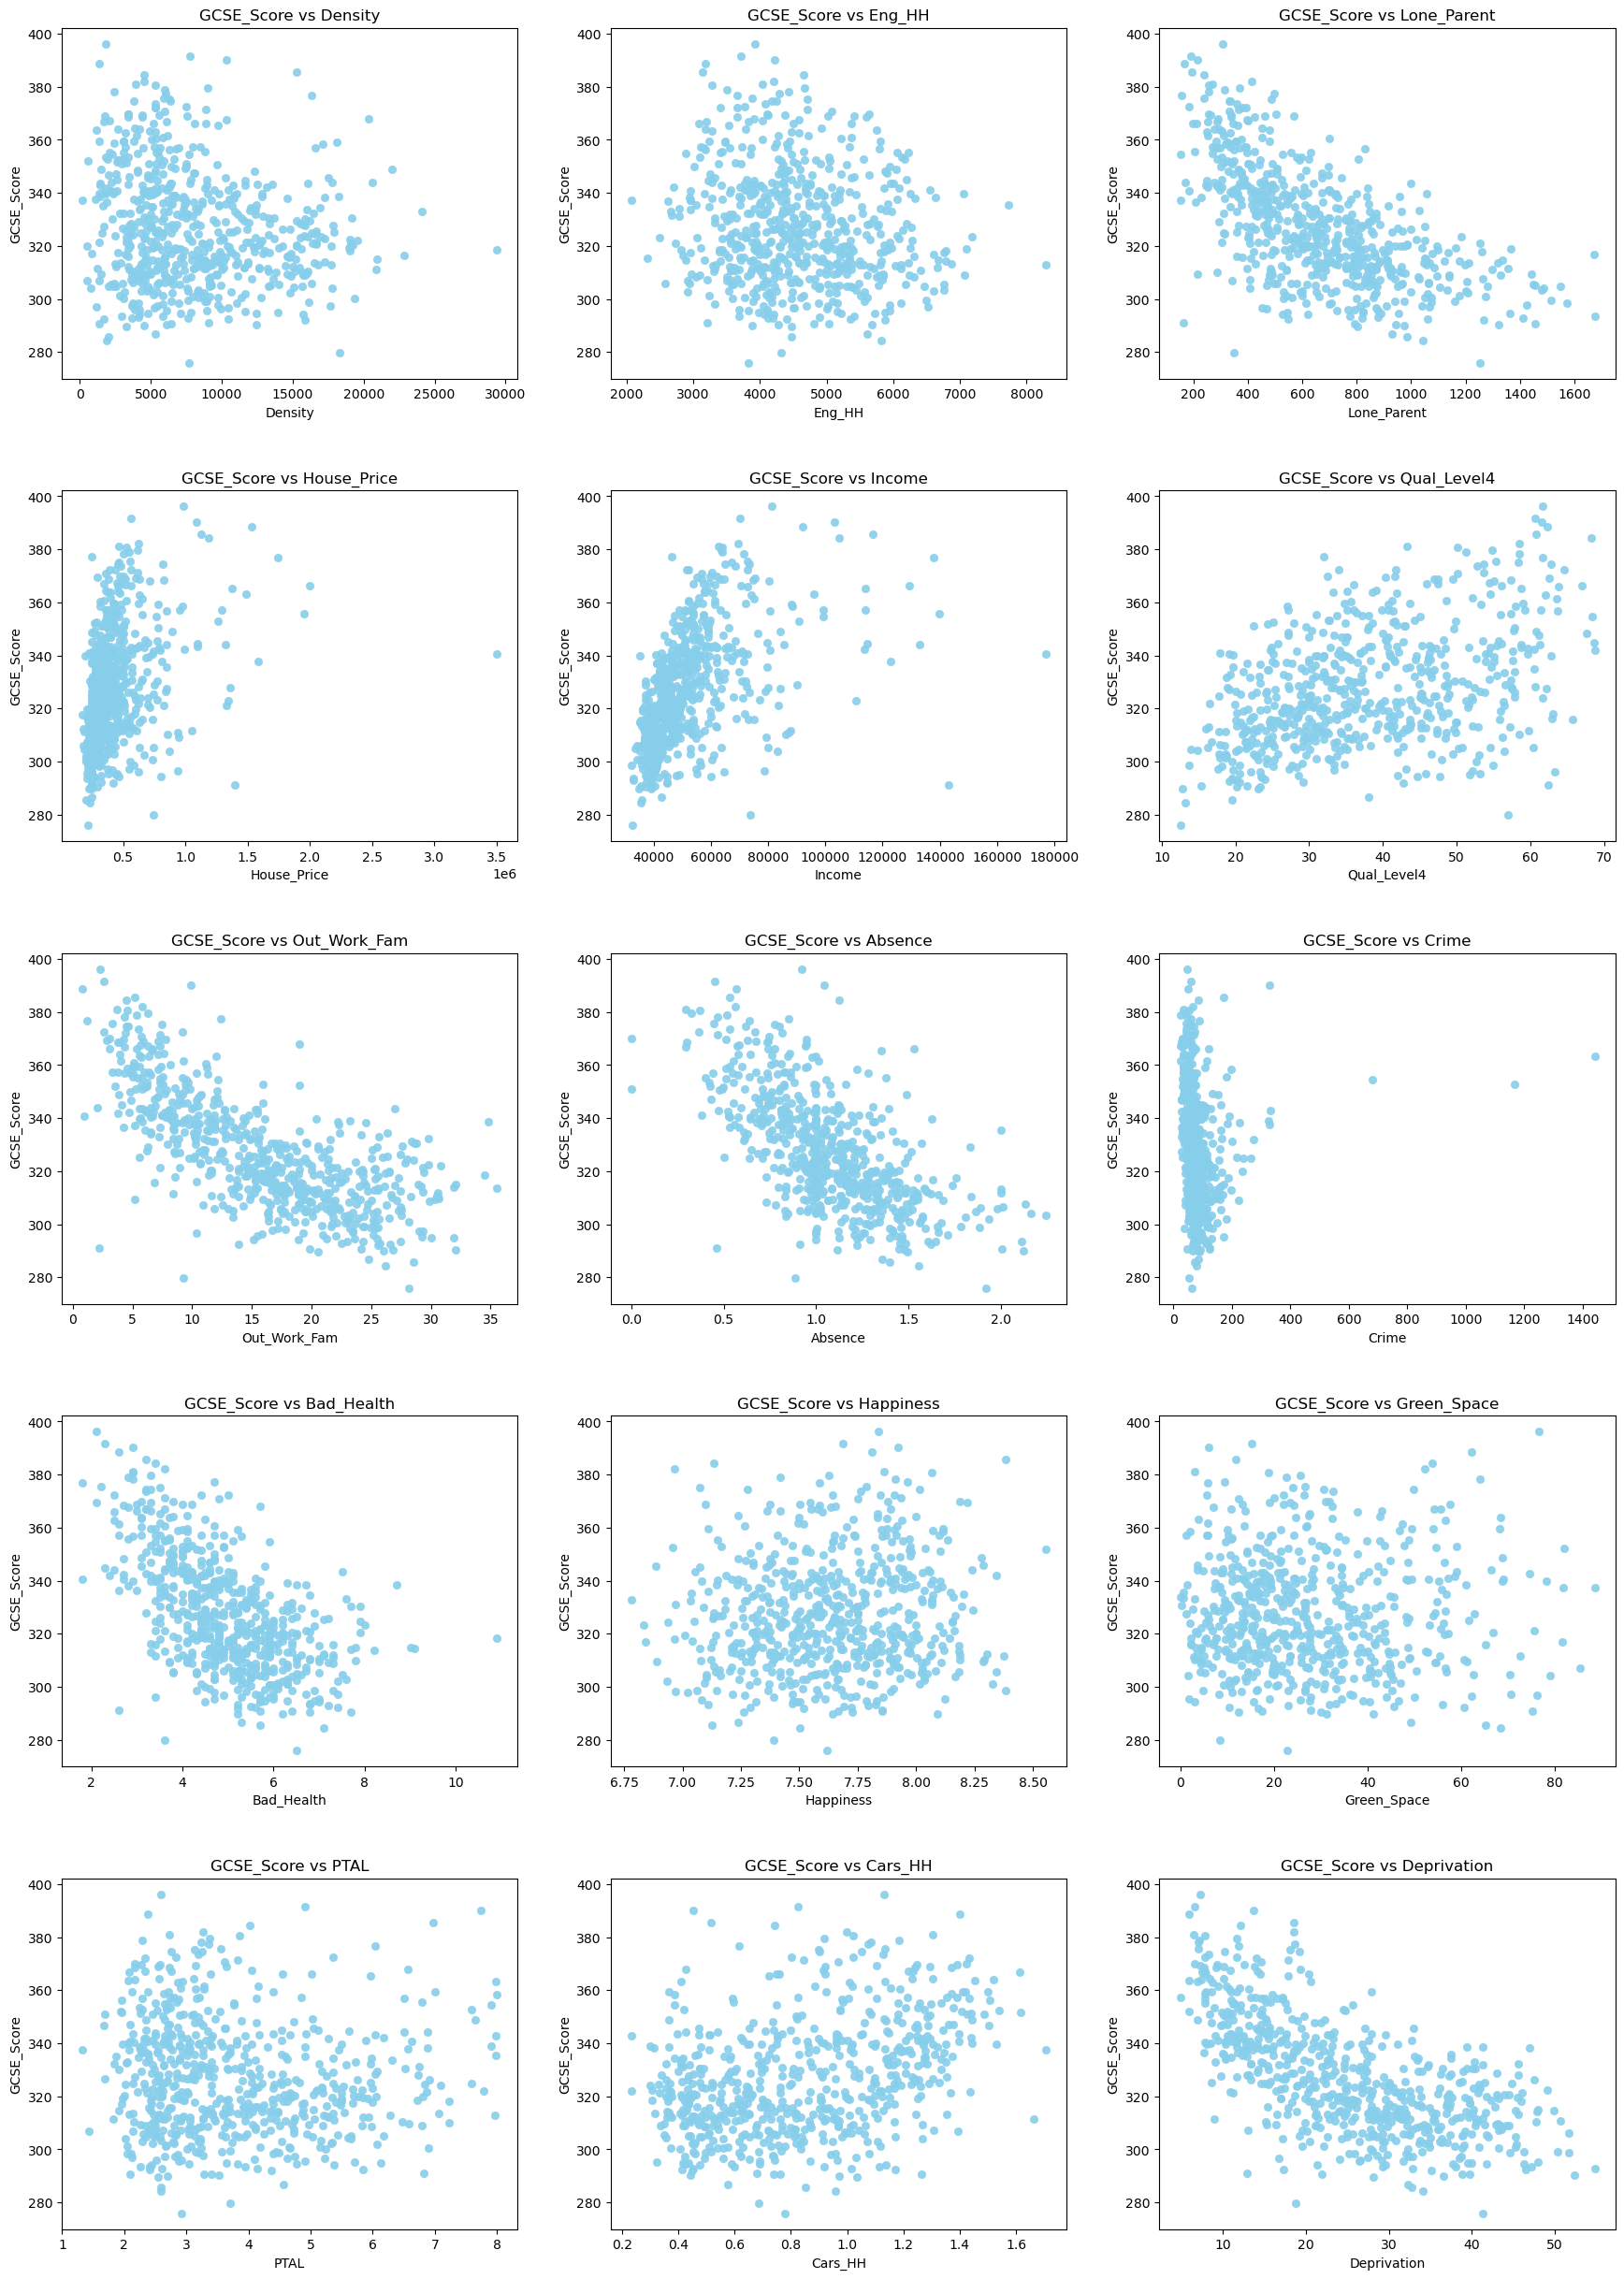

In [19]:
# Define the independent variables to be plotted
variables = ['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 'Income', 
             'Qual_Level4', 'Out_Work_Fam', 'Absence', 'Crime', 
             'Bad_Health', 'Happiness', 'Green_Space', 'PTAL', 
             'Cars_HH', 'Deprivation']

# Create a 3x5 subplot layout
fig, axes = plt.subplots(5, 3, figsize=(18, 25))
axes = axes.flatten()

# Plot scatter plots
for i, var in enumerate(variables):
    sns.scatterplot(x=var, y='GCSE_Score', data=data, ax=axes[i], edgecolor=None, color='skyblue', alpha=0.9)
    axes[i].set_title(f'GCSE_Score vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('GCSE_Score')
    axes[i].grid(False)
    
# Adjust layout
plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=4.0)

# Save Figure
plt.savefig('scatter_plots_adjusted.jpg', format='jpg', dpi=300)

# Display the plots
plt.show()


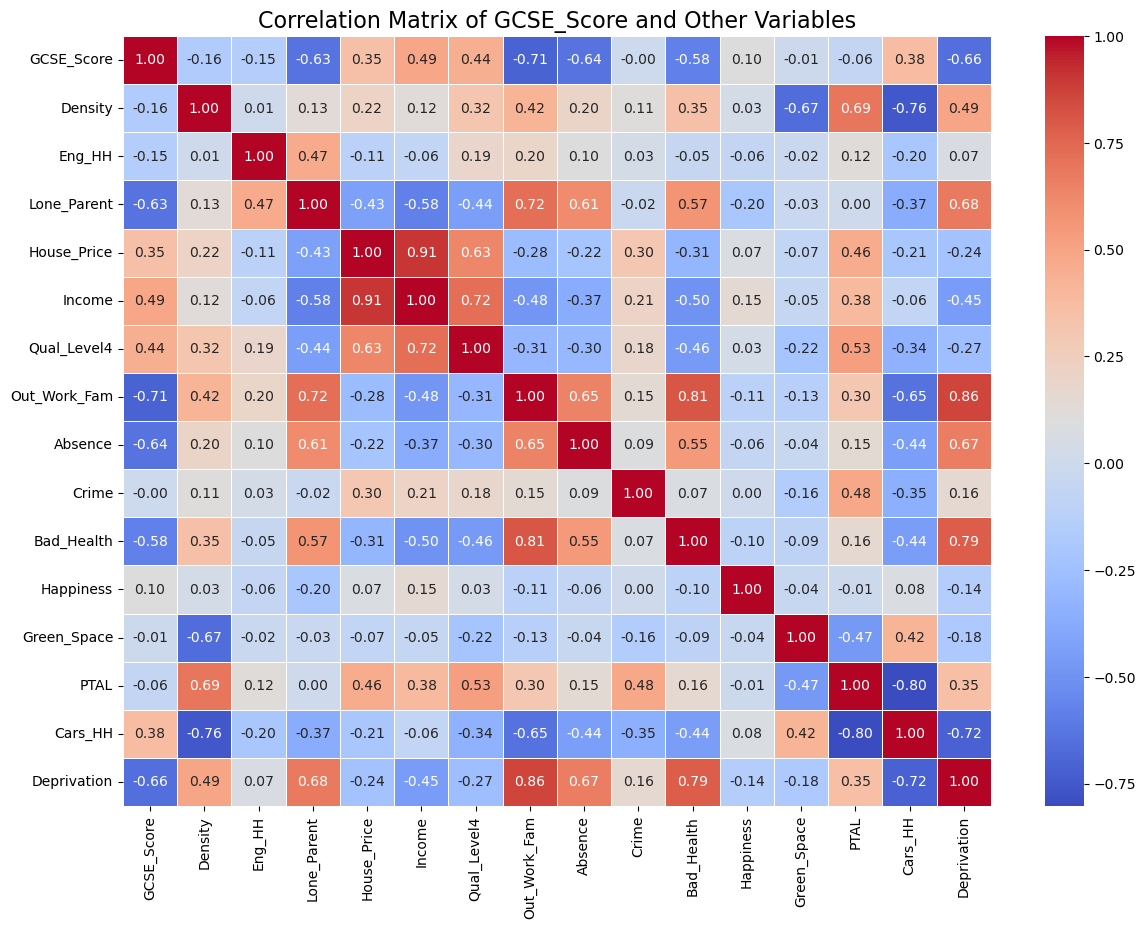

In [8]:
# Define the variables to calculate correlation
variables = ['GCSE_Score', 'Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
             'Income', 'Qual_Level4', 'Out_Work_Fam', 'Absence', 'Crime', 
             'Bad_Health', 'Happiness', 'Green_Space', 'PTAL', 
             'Cars_HH', 'Deprivation']

# Calculate the correlation matrix
corr_matrix = data[variables].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Matrix of GCSE_Score and Other Variables', fontsize=16)

# Display the plot
plt.show()


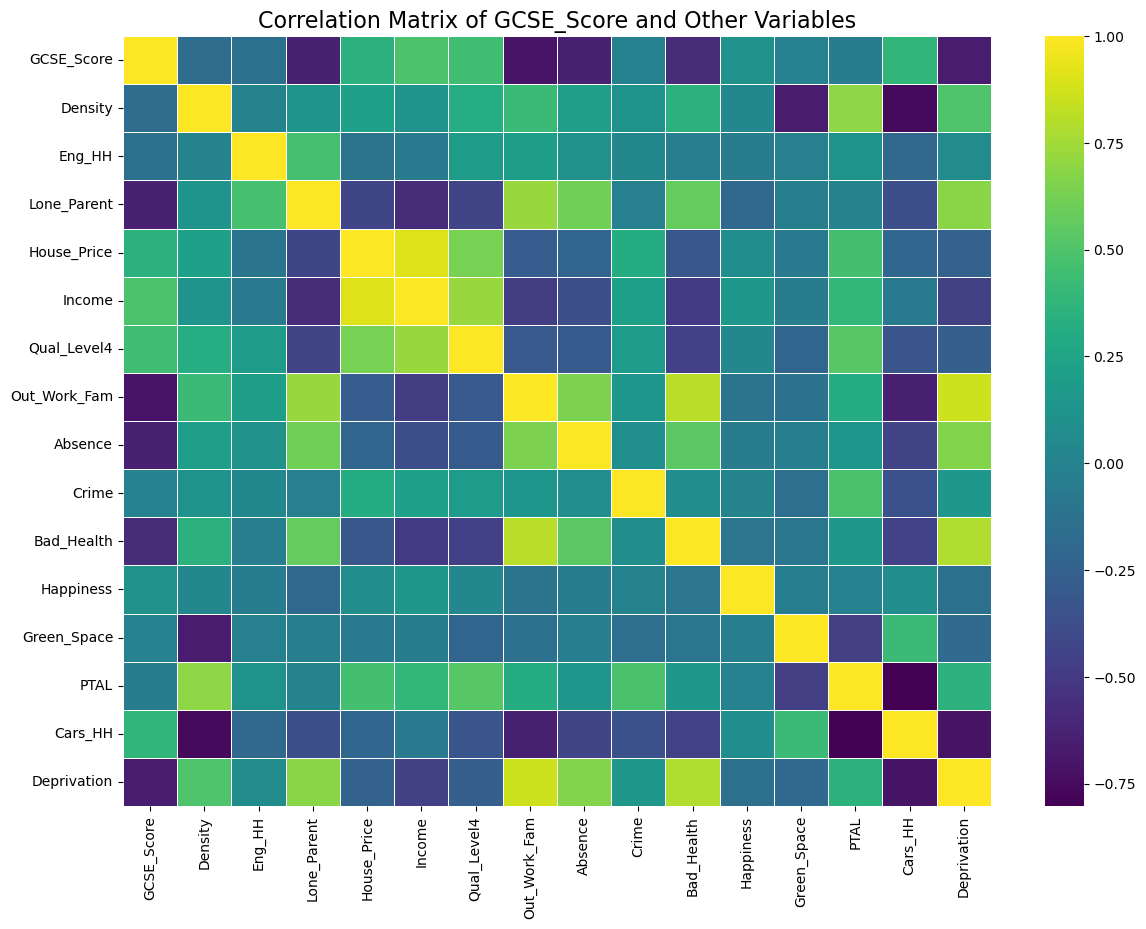

In [9]:
# Load the data
data = pd.read_csv('cleaned_data.csv')

# Define the variables to calculate correlation
variables = ['GCSE_Score', 'Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
             'Income', 'Qual_Level4', 'Out_Work_Fam', 'Absence', 'Crime', 
             'Bad_Health', 'Happiness', 'Green_Space', 'PTAL', 
             'Cars_HH', 'Deprivation']

# Calculate the correlation matrix
corr_matrix = data[variables].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='viridis', linewidths=0.5, cbar=True)

# Set the title
plt.title('Correlation Matrix of GCSE_Score and Other Variables', fontsize=16)

# Display the plot
plt.show()
